In [2]:
import pandas as pd

file_path = r"D:\Rishika Internship\snapdeal_products_clean_data.csv"

df = pd.read_csv(file_path, encoding="latin1")
print(df.head())

   Top Section                       Subcategory  \
0  Accessories  Car & Vehicle Electronics\r\n408   
1  Accessories  Car & Vehicle Electronics\r\n408   
2  Accessories  Car & Vehicle Electronics\r\n408   
3  Accessories  Car & Vehicle Electronics\r\n408   
4  Accessories  Car & Vehicle Electronics\r\n408   

                                        Product Name  \
0  Selifaur Electronics Accessory For Car 2 m ( P...   
1  Selifaur Electronics Accessory For Car 2 m ( P...   
2  Selifaur Electronics Accessory For Car 2 m ( P...   
3  Selifaur Electronics Accessory For Car 2 m ( P...   
4  Selifaur Electronics Accessory For Car 2 m ( P...   

  Brand (heuristic/listing) Price Original Price  Discount  Rating (detail)  \
0                  Selifaur   437          1,299      66.0              0.0   
1                  Selifaur   437          1,299      66.0              0.0   
2                  Selifaur   437          1,299      66.0              0.0   
3                  Selifaur   437 

In [8]:
df[["Price", "Rating (detail)"]].dtypes


Price               object
Rating (detail)    float64
dtype: object

In [12]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Rating (detail)"] = pd.to_numeric(df["Rating (detail)"], errors="coerce")

df = df.dropna(subset=["Price", "Rating (detail)"])

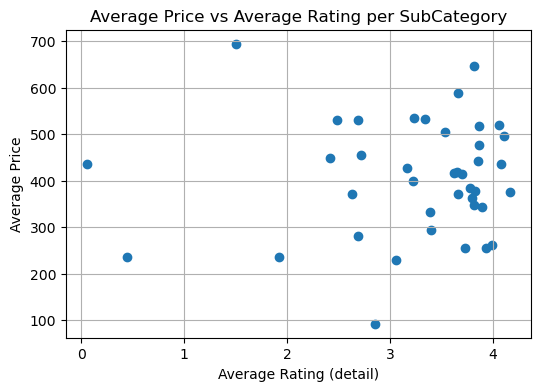

In [19]:

subcat_avg = df.groupby("Subcategory").agg(
    Avg_Price=("Price", "mean"),
    Avg_Rating=("Rating (detail)", "mean")
).reset_index()

plt.figure(figsize=(6,4))
plt.scatter(subcat_avg["Avg_Rating"], subcat_avg["Avg_Price"])
plt.xlabel("Average Rating (detail)")
plt.ylabel("Average Price")
plt.title("Average Price vs Average Rating per SubCategory")
plt.grid(True)
plt.show()


In [20]:
pip install plotly


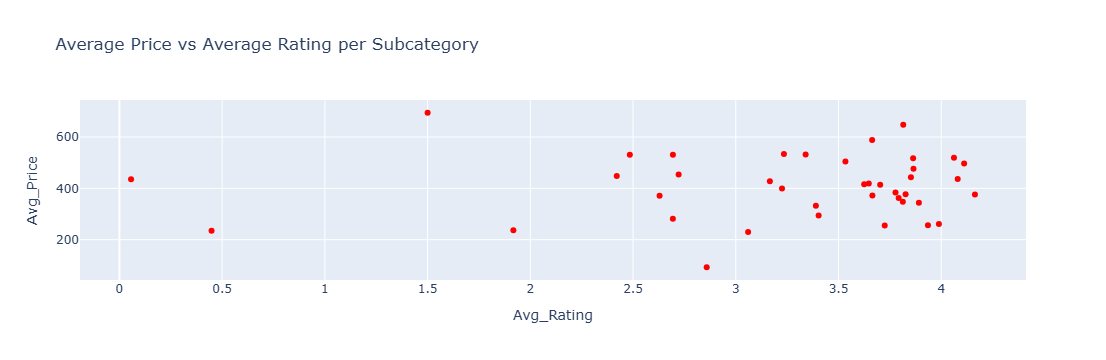

In [24]:
import plotly.express as px

fig = px.scatter(
    subcat_avg,
    x="Avg_Rating",
    y="Avg_Price",
    hover_name="Subcategory",  # when you hover, you see subcategory name
    title="Average Price vs Average Rating per Subcategory",
    color_discrete_sequence=["red"]
)

fig.show()


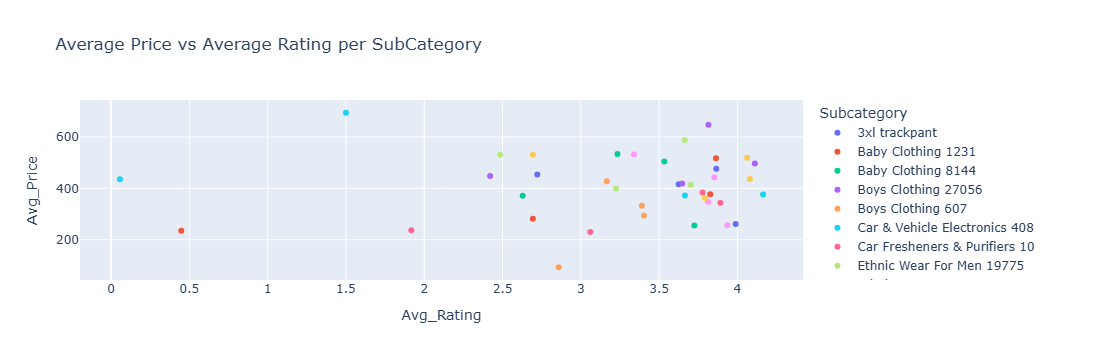

In [29]:
fig = px.scatter(
    subcat_avg,
    x="Avg_Rating",
    y="Avg_Price",
    hover_name="Subcategory",
    color="Subcategory",  # different color for each subcategory
    title="Average Price vs Average Rating per SubCategory"
)

fig.show()


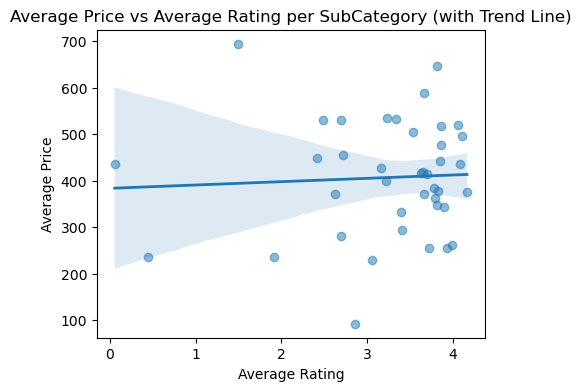

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.regplot(
    data=subcat_avg,
    x='Avg_Rating',
    y='Avg_Price',
    scatter_kws={'alpha': 0.5},
    line_kws={'linewidth': 2}
)

plt.title('Average Price vs Average Rating per SubCategory (with Trend Line)')
plt.xlabel('Average Rating')
plt.ylabel('Average Price')
plt.show()
